In [129]:
#imports

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [114]:
import warnings
warnings.filterwarnings("ignore")

In [115]:
# creating a directory for plots if it doesn't exist

if not os.path.isdir('Plots'):
    os.mkdir("Plots")

In [116]:
#Read the selected dataset
df = pd.read_csv('NBA Salaries(1990-2023).csv')

# list the fields/variables
display(df.head())
# identifing their types
display(df.dtypes)

print("     ")
print("Data Preparation 'b':")

print("     ")
print('Outliers:')
print("     ")

Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
display(IQR)
# Identify outliers
outliers = df[(df['salary'] < Q1 - 1.5 * IQR) | (df['salary'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'salary':")
print(outliers[['playerName', 'salary']])

# Remove outliers from 'salary' column
df = df[~((df['salary'] < Q1 - 1.5 * IQR) | (df['salary'] > Q3 + 1.5 * IQR))]


Q1 = df['inflationAdjSalary'].quantile(0.25)
Q3 = df['inflationAdjSalary'].quantile(0.75)
IQR = Q3 - Q1
display(IQR)
# Identify outliers
outliers = df[(df['inflationAdjSalary'] < Q1 - 1.5 * IQR) | (df['inflationAdjSalary'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'inflationAdjSalary':")
print(outliers[['playerName', 'inflationAdjSalary']])

# Remove outliers from 'inflationAdjSalary' column
print("  After Fixing the Outliers:   ")
df = df[~((df['inflationAdjSalary'] < Q1 - 1.5 * IQR) | (df['inflationAdjSalary'] > Q3 + 1.5 * IQR))]
display(df.head())

print("     ")
print('Missing data:')
print("     ")

# List Missing data before the Imputing:
columns_with_missing_data = df.columns[df.isnull().any()]
print("Columns with missing data:")
print(columns_with_missing_data)
# Imputing the inconsistencies :
df['salary'] = df['salary'].fillna(df['salary'].mean()).astype(int)
df['inflationAdjSalary'] = df['inflationAdjSalary'].fillna(df['inflationAdjSalary'].mean()).astype(int)
print("  After Fixing the Missing Data:   ")
display(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


,playerName,seasonStartYear,salary,inflationAdjSalary
0,Patrick Ewing,1990,4250000,9694547
1,Hot Rod Williams,1990,3785000,8633850
2,Hakeem Olajuwon,1990,3175000,7242397
3,Charles Barkley,1990,2900000,6615103
4,Chris Mullin,1990,2850000,6501049


playerName            object
seasonStartYear        int64
salary                 int64
inflationAdjSalary     int64
dtype: object

     
Data Preparation 'b':
     
Outliers:
     


4038880.0

Outliers in 'salary':
            playerName    salary
1521     Magic Johnson  14660000
1939     Patrick Ewing  18724000
2390    Michael Jordan  30140000
2391      Horace Grant  14857000
2392     Reggie Miller  11250000
...                ...       ...
15317  Josh Richardson  11615328
15318    Marvin Bagley  11312114
15319   DeAndre Jordan  11109327
15320    Dwight Powell  11080125
15321   Devonte Graham  11000000

[1582 rows x 2 columns]


4079400.0

Outliers in 'inflationAdjSalary':
            playerName  inflationAdjSalary
352         Larry Bird            15403814
735     David Robinson            12089150
1136    David Robinson            11778567
1522    David Robinson            14615339
1523      James Worthy            14515234
...                ...                 ...
15322  Zion Williamson            11705820
15323   Larry Nance Jr            11659479
15324      Jeremy Lamb            11451274
15325   Reggie Jackson            11325310
15326   Richaun Holmes            11325310

[649 rows x 2 columns]
  After Fixing the Outliers:   


,playerName,seasonStartYear,salary,inflationAdjSalary
0,Patrick Ewing,1990,4250000,9694547
1,Hot Rod Williams,1990,3785000,8633850
2,Hakeem Olajuwon,1990,3175000,7242397
3,Charles Barkley,1990,2900000,6615103
4,Chris Mullin,1990,2850000,6501049


     
Missing data:
     
Columns with missing data:
Index([], dtype='object')
  After Fixing the Missing Data:   


,playerName,seasonStartYear,salary,inflationAdjSalary
0,Patrick Ewing,1990,4250000,9694547
1,Hot Rod Williams,1990,3785000,8633850
2,Hakeem Olajuwon,1990,3175000,7242397
3,Charles Barkley,1990,2900000,6615103
4,Chris Mullin,1990,2850000,6501049


In [117]:
 df=pd.read_csv("cleaned_data.csv")

# the statistical summaries
display(df.describe(include='number'))
display(df.describe(include='object'))

,seasonStartYear,salary,inflationAdjSalary
count,13626.000000,1.362600e+04,1.362600e+04
mean,2006.467489,2.195168e+06,3.175440e+06
std,9.615958,2.040533e+06,2.756306e+06
min,1990.000000,2.706000e+03,4.824000e+03
25%,1998.000000,6.750000e+05,1.049911e+06
50%,2007.000000,1.517981e+06,2.254333e+06
75%,2015.000000,3.120810e+06,4.663255e+06
max,2021.000000,1.033562e+07,1.129111e+07


,playerName
count,13626
unique,2811
top,Udonis Haslem
freq,20


0.9635918069925149

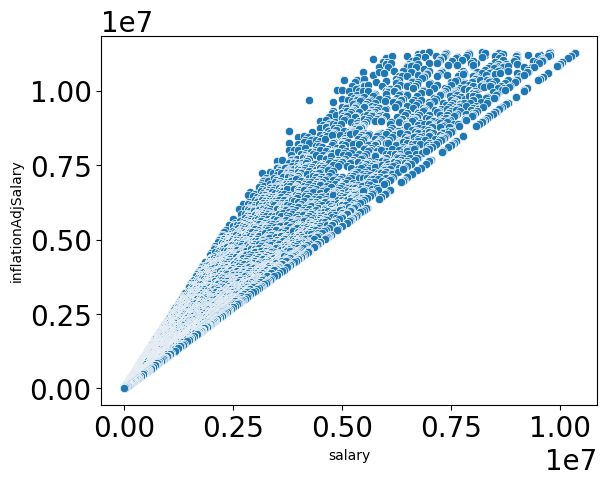

In [118]:
#Descriptive Analysis

corr=df['salary'].corr(df['inflationAdjSalary'])
display(corr)

sns.scatterplot(x="salary", y="inflationAdjSalary", data=df);

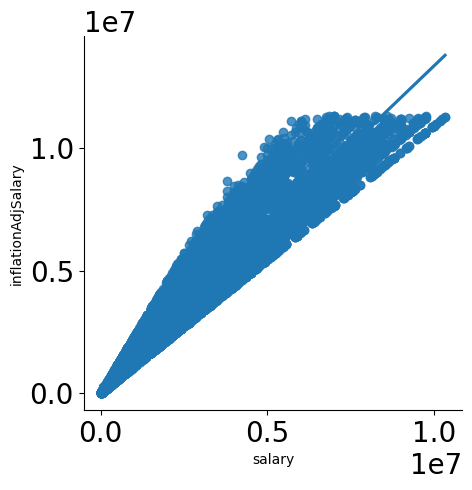

In [119]:
#adding a best fit line

sns.lmplot(x='salary',y='inflationAdjSalary',data=df)

In [120]:
player_earnings=df.groupby('playerName')['inflationAdjSalary'].sum().reset_index()
sorted_player_earnings=player_earnings.sort_values(by='inflationAdjSalary',ascending=False).head(10)
display(sorted_player_earnings)

,playerName,inflationAdjSalary
771,Donyell Marshall,118736088
1702,Louis Williams,113658248
1877,Metta World Peace,108536228
2635,Trevor Ariza,104680818
788,Drew Gooden,103243970
1613,Kyle Korver,103082329
39,Al Harrington,100164435
468,Christian Laettner,97972751
43,Al-Farouq Aminu,97714242
1328,Joe Smith,97647447


In [121]:
player_earnings2=df.groupby('playerName')['salary'].sum().reset_index()
sorted_player_earnings2=player_earnings2.sort_values(by='salary',ascending=False).head(10)
display(sorted_player_earnings2)

,playerName,salary
1702,Louis Williams,92208319
43,Al-Farouq Aminu,82597906
2635,Trevor Ariza,81603910
1613,Kyle Korver,79272208
1877,Metta World Peace,75713906
788,Drew Gooden,75015681
1150,Jameer Nelson,72802422
771,Donyell Marshall,72417867
2687,Udonis Haslem,71639344
527,DJ Augustin,71375190


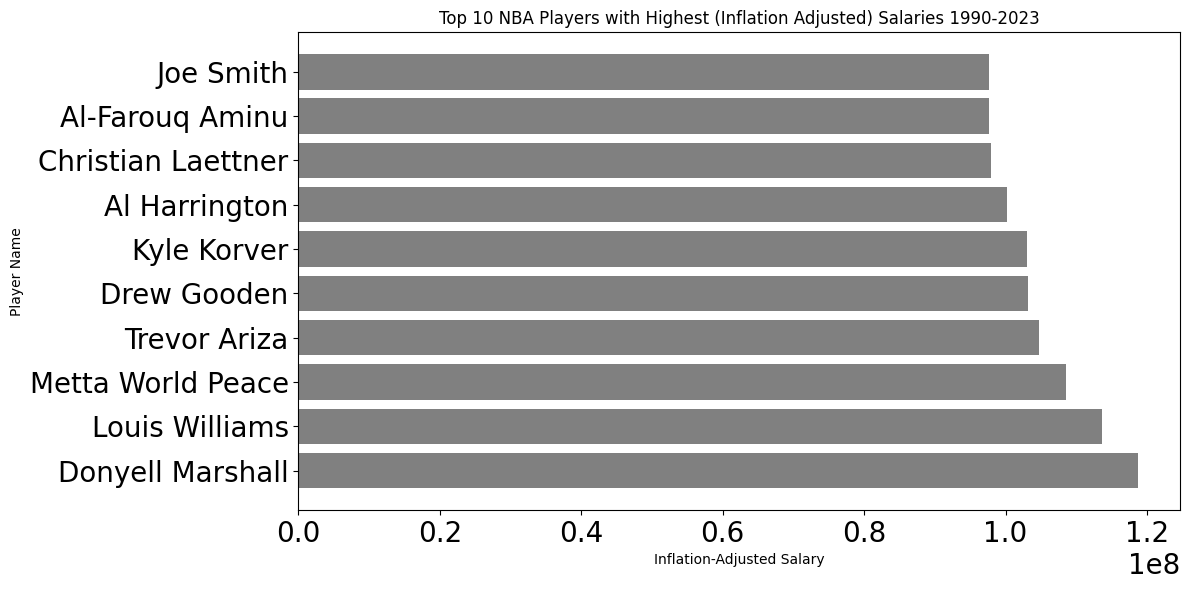

In [122]:
plt.figure(figsize=(12, 6))
fig_bar=plt.barh(sorted_player_earnings['playerName'], sorted_player_earnings['inflationAdjSalary'], color='grey')
plt.xlabel('Inflation-Adjusted Salary')
plt.ylabel('Player Name')
plt.title('Top 10 NBA Players with Highest (Inflation Adjusted) Salaries 1990-2023')
plt.tight_layout()
plt.show()


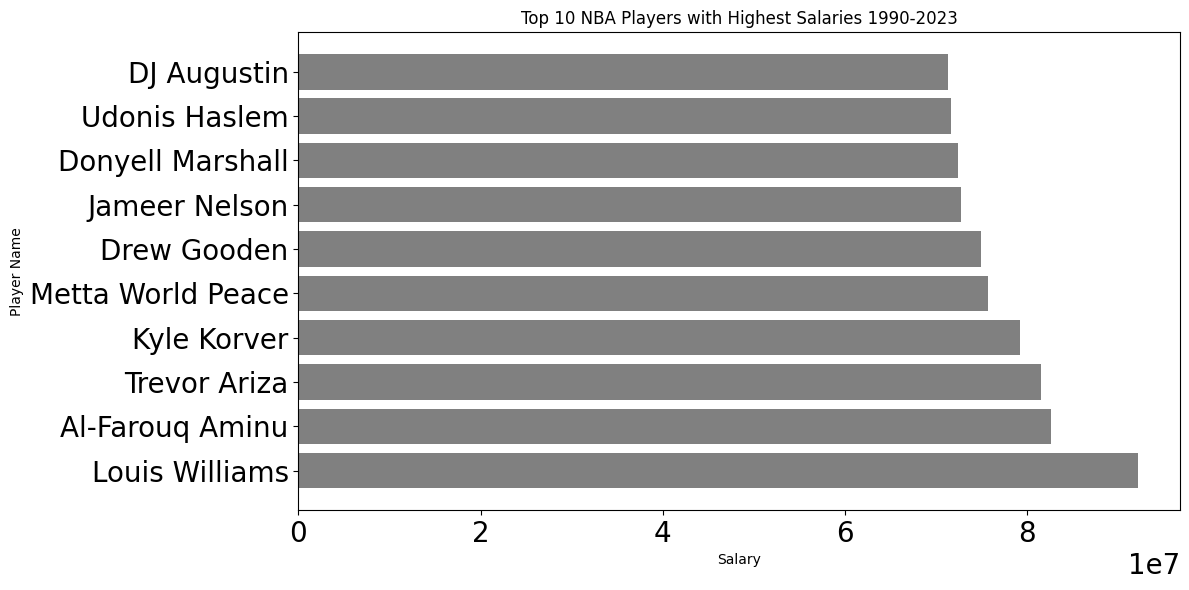

In [123]:
plt.figure(figsize=(12, 6))
fig_bar=plt.barh(sorted_player_earnings2['playerName'], sorted_player_earnings2['salary'], color='grey')
plt.xlabel('Salary')
plt.ylabel('Player Name')
plt.title('Top 10 NBA Players with Highest Salaries 1990-2023')
plt.tight_layout()
plt.show()

In [124]:
merged_df=pd.merge(sorted_player_earnings2,sorted_player_earnings,on='playerName')
display(merged_df)

,playerName,salary,inflationAdjSalary
0,Louis Williams,92208319,113658248
1,Al-Farouq Aminu,82597906,97714242
2,Trevor Ariza,81603910,104680818
3,Kyle Korver,79272208,103082329
4,Metta World Peace,75713906,108536228
5,Drew Gooden,75015681,103243970
6,Donyell Marshall,72417867,118736088


In [133]:
player_salary = merged_df['salary']
player_infl_salary= merged_df['inflationAdjSalary']
player_names= merged_df['playerName']

plt.figure(figsize=(5,5),dpi=80)
bar_width=0.35
index=range(len(player_names))

plt.bar(index,player_salary,width=bar, color='grey',label='Salary')
plt.bar(index,player_infl_salary,width=bar, color='black',label='Inflation Adjusted Salary')

plt.xlabel('Players',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.title('Salary v/s Inflation Adjusted Salary of Top NBA Players 1990-2023',fontsize=18)
plt.xticks(index,player_names,rotation=90)
plt.legend(loc=2, prop={'size': 14})

plt.show()

NameError: name 'bar' is not defined

<Figure size 400x400 with 0 Axes>